In [1]:
# Exercicio 2

from random import random
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
class MultilayerPerceptron():

    def __init__(self):
        self.NN = [] 

    # metodo para criacao de camadas
    def DenseLayer(self, n_neurons, input_layer=False):
        n_inputs = None
        if input_layer != False:
            n_inputs = input_layer # inputs pesos baseados na input_layer
        else:
            n_inputs = len(self.NN[-1]) # inputs pesos baseados na camada anterior

        # cria camda com pesos randomicos
        new_layer = [{'weights': [random() for i in range(n_inputs + 1)]} for i in range(n_neurons)]

        self.NN.append(new_layer) # adiciona camada a rede

    # metodo para insercao de 1 para o bias
    def insert_one(self, inputs):
        inputs = np.insert(inputs, [0], [1], axis=0)
        return inputs

    # metodo para multiplicar e somar os pesos pelo inputs
    def activate(self, weights, inputs):
        X = np.array(inputs)        
        weights = np.array(weights) 
        X = self.insert_one(X)      
        z = X @ weights.T           
        return z

    # funcao de ativacao sigmoid
    def sigmoid(self, z):
        return 1. / (1. + np.exp(-z))

    # derivando a sigmoid
    def sigmoid_derivative(self, Z):
        return Z * (1.0 - Z)

    # propagacao
    def forward(self, row):
        inputs = row
        for layer in self.NN: # itera camadas na rede
            new_inputs = []
            for neuron in layer: # itera neurônio da camada
                Z = self.activate(neuron['weights'], inputs) 
                neuron['output'] = self.sigmoid(Z) # aplica sigmoid
                new_inputs.append(neuron['output']) # adiciona output (A) na proxima camada
            inputs = new_inputs
        return inputs

    # metodo para calcular deltas dos neuronios
    def calculate_deltas(self, y):
        # backpropagation
        for i, layer in reversed(list(enumerate(self.NN))):
            # cria lista de erros
            errors = list()
            # verifica erro camada de saida
            if i == len(self.NN) - 1:
                l = len(layer)
                for j, neuron in enumerate((layer)):
                    # calcula erro para neuronio na camada de saida
                    errors.append(y[j] - neuron['output'])
            # calcula erro nas demais camadas
            else:
                for j in range(len(layer)):
                    error = 0.0
                    for neuron in self.NN[i + 1]:  
                        delta_anterior = neuron['delta'] # recupera o delta da camada anterior
                        peso_anterior = neuron['weights'][j + 1] # recupera peso da camada anterior
                        err = peso_anterior * delta_anterior # calcula o erro
                        error += err
                    errors.append(error) 
            # calcula deltas para cada neurônio da camada atual
            for j, neuron in enumerate((layer)):
                d_sigmoid = self.sigmoid_derivative(neuron['output'])
                erro = errors[j]
                delta = erro * d_sigmoid
                neuron['delta'] = delta

    # metodo de atualizacao dos pesos
    def update_weights(self, row, l_rate):
        # percorre da camada de saida para de entrada
        for i, layer in reversed(list(enumerate(self.NN))):
            if i == 0: # i=0 na input layer
                inputs = row
            else:
                inputs = []
                for neuron in self.NN[i - 1]: # recupera outputs da camada
                    out = neuron['output'] 
                    inputs.append(out)
            for neuron in self.NN[i]:
                # atualizando bias
                bias = neuron['weights'][0]
                delta = neuron['delta']
                UPDATE = bias + l_rate * neuron['delta']
                neuron['weights'][0] = UPDATE  # atualizando bias
                # atualizando pesos
                for j in range(0, len(inputs)):
                    input = inputs[j]
                    delta = neuron['delta']
                    weight_ant = neuron['weights'][j + 1]
                    UPDATE = weight_ant + (l_rate * delta * input)
                    neuron['weights'][j + 1] = UPDATE

    # metodo de ajuste do shape do target (y)
    def ajust_shapes(self, X, y):
        shape_X = X.shape
        shape_y = y.shape
        if len(shape_y) == 1:
            y = y.reshape(shape_y[0], 1)
        return y

    
    # metodo de treinamento
    def fit(self, train_X, train_y, l_rate, epochs):
        self.epochs = epochs # epocas para plotagem do custo
        self.cost = [] # vetor de custo
        train_y = self.ajust_shapes(train_X, train_y) # ajustar (y)      
        for epoch in range(epochs): # iterando epocas
       
            sum_error = 0 # somatorio do erro do custo
            for i, row in enumerate(train_X): # iterando as linhas
                y = np.array(train_y[i])
                outputs = np.array(self.forward(row)) # propagacao
                sum_error += (y-outputs[0])**2 # somando erro gerado para uma linha de X
                self.calculate_deltas(y) # calculando deltas
                self.update_weights(train_X[i], l_rate) # atualizando pesos
            self.cost.append(np.sum(sum_error)) # custo

    # medoto que imprimi custo
    def print_cost(self):
        for i in range(len(self.cost)):
            print('EPOCH {}, CUSTO {}'.format(i, cost[i]))

    # metodo que realiza classificacao binaria
    def classify(self, row, threshold=0.5):
        pred_proba = self.forward(row)
        pred = []
        for i in range(len(pred_proba)):
            if pred_proba[i]>=threshold:
                pred.append(1)
            else:
                pred.append(0)
        return pred, pred_proba

    # metodo que gera predição não binária e probabilística
    def predict(self, row):
        pred = self.forward(row)
        return pred

    # metodo para grafico
    def plot_cost(self):
        fig, ax = plt.subplots()
        ax.plot(np.arange(self.epochs), self.cost, 'r')  
        ax.set_xlabel('Iterações')  
        ax.set_ylabel('Loss')  
        ax.set_title('Loss vs. Epoch')


In [3]:
# problema XOR

X = np.array([[1, 1],
              [0, 0],
              [0, 1],
              [1, 0]])

y = np.array([0, 0, 1, 1])

In [4]:
# hyperparâmetros

input_shape = 2 # camada de entrada
l_rate = 0.5 # taxas de aprendizado
epochs = 3000 # quantidade de epocas

In [5]:
# instanciando objeto da classe

mlp = MultilayerPerceptron()

# criando camadas

mlp.DenseLayer(2, input_shape)  ## camada hidden
mlp.DenseLayer(1) # camada output

# treinamento

mlp.fit(X, y, l_rate, epochs)

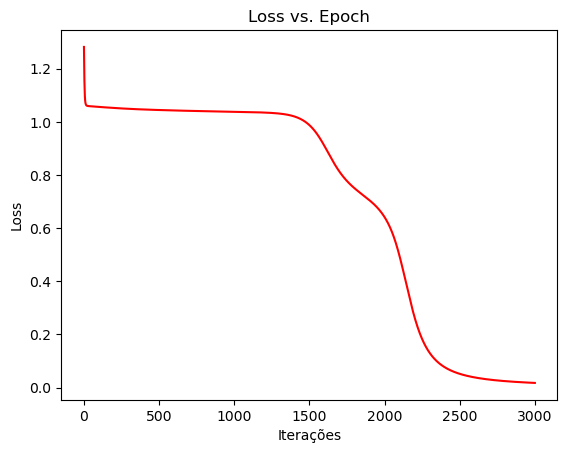

In [6]:
# grafido custo

mlp.plot_cost()

In [7]:
# teste

pred, proba = mlp.classify([1, 1])
print("Entrada [1,1] = Classe {}, Probabilidade{}".format(pred,proba))

pred, proba = mlp.classify([0, 0])
print("Entrada [0,0] = Classe {}, Probabilidade{}".format(pred,proba))

pred, proba = mlp.classify([0, 1])
print("Entrada [0,1] = Classe {}, Probabilidade{}".format(pred,proba))

pred, proba = mlp.classify([1, 0])
print("Entrada [1,0] = Classe {}, Probabilidade{}".format(pred,proba))


Entrada [1,1] = Classe [0], Probabilidade[0.0823772043351125]
Entrada [0,0] = Classe [0], Probabilidade[0.05479705615575684]
Entrada [0,1] = Classe [1], Probabilidade[0.9374632585581838]
Entrada [1,0] = Classe [1], Probabilidade[0.9372207373339969]


In [8]:
# problema de auto-associador

# a) Id(8x8)

iden_8 = np.identity(8) # matriz identidade
iden_8
iden_8.shape

(8, 8)

In [9]:
# hyperparametros

input_shape = iden_8.shape[0] # camada de entrada
l_rate = 0.5 # taxas de aprendizado
epochs = 3000 # quantidade de epocas
output_shape = input_shape # shape de saida

N_fist_camada = math.ceil(math.log(input_shape, 2)) # quantidade de neurônios da hidden Log2N

In [10]:
# instanciando objeto da classe

mlp = MultilayerPerceptron() # instancia
mlp.DenseLayer(N_fist_camada, input_shape) # primeira camada com Log2N neuronios e entrada de N
mlp.DenseLayer(output_shape) # camada de saida


In [11]:
# treinamento Id(8x8)

mlp.fit(iden_8, iden_8, l_rate, epochs) # treinamento


In [12]:
# teste Id(8x8)

print("# Predição do encoder\n")
for i in range(len(iden_8)):
  pred, pred_proba = mlp.classify(iden_8[i]) # classifica linha da matrix
  print("ENCODER -> {}  > - < DECODER -> {}".format(iden_8[i], pred)) # imprime resultado do decoder


# Predição do encoder

ENCODER -> [1. 0. 0. 0. 0. 0. 0. 0.]  > - < DECODER -> [1, 0, 0, 0, 0, 0, 0, 0]
ENCODER -> [0. 1. 0. 0. 0. 0. 0. 0.]  > - < DECODER -> [0, 1, 0, 0, 0, 0, 0, 0]
ENCODER -> [0. 0. 1. 0. 0. 0. 0. 0.]  > - < DECODER -> [0, 0, 1, 0, 0, 0, 0, 0]
ENCODER -> [0. 0. 0. 1. 0. 0. 0. 0.]  > - < DECODER -> [0, 0, 0, 1, 0, 0, 0, 0]
ENCODER -> [0. 0. 0. 0. 1. 0. 0. 0.]  > - < DECODER -> [0, 0, 0, 0, 1, 0, 0, 0]
ENCODER -> [0. 0. 0. 0. 0. 1. 0. 0.]  > - < DECODER -> [0, 0, 0, 0, 0, 1, 0, 0]
ENCODER -> [0. 0. 0. 0. 0. 0. 1. 0.]  > - < DECODER -> [0, 0, 0, 0, 0, 0, 1, 0]
ENCODER -> [0. 0. 0. 0. 0. 0. 0. 1.]  > - < DECODER -> [0, 0, 0, 0, 0, 0, 0, 1]


In [13]:
# b) Id(15x15)

iden = np.identity(15) # matriz identidade
iden
iden.shape

(15, 15)

In [14]:
# hyperparametros

input_shape = iden.shape[0] # camada de entrada
l_rate = 0.5 # taxa de aprendizado
epochs = 3000 # quantidade de epocas
output_shape = input_shape # shape de saida

N_fist_camada = math.ceil(math.log(input_shape, 2)) # quantidade de neuronios da hidden Log2N


In [15]:
# instanciando objeto da classe

mlp = MultilayerPerceptron() # instancia
mlp.DenseLayer(N_fist_camada, input_shape) # primeira camada com Log2N neuronios e entrada de N
mlp.DenseLayer(output_shape) # camada de saida


In [16]:
# treinamento Id(15x15)

mlp.fit(iden, iden, l_rate, epochs) # treinamento

In [17]:
# teste Id(15x15)

print("# Predição do encoder\n")
for i in range(len(iden)):
  pred, pred_proba = mlp.classify(iden[i]) # classifica linha da matrix
  print("ENCODER -> {}  > - < DECODER -> {}".format(iden[i], pred)) # imprime resultado do decoder


# Predição do encoder

ENCODER -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  > - < DECODER -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ENCODER -> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  > - < DECODER -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ENCODER -> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  > - < DECODER -> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ENCODER -> [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  > - < DECODER -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ENCODER -> [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  > - < DECODER -> [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ENCODER -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  > - < DECODER -> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ENCODER -> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]  > - < DECODER -> [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
ENCODER -> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]  > - < DECODER -> [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
E